In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/Train'
valid_path = 'Datasets/Test'

In [3]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step


In [4]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes
folders = glob('Datasets/Train/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [8]:
# view the structure of the model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,490,889 (93.43 MB)

 Trainable params: 903,177 (3.45 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [23]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 2602 images belonging to 9 classes.


In [24]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 672 images belonging to 9 classes.


In [25]:
# fit the model
# Run the cell. It will take some time to execute

batch_size = 16


r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=300,
    steps_per_epoch=len(training_set) // batch_size,  # Adjust for batch size
    validation_steps=len(test_set) // batch_size       # Adjust for batch size
)

Epoch 1/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 460ms/step - accuracy: 0.7359 - loss: 1.3078 - val_accuracy: 0.7812 - val_loss: 1.6463
Epoch 2/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 458ms/step - accuracy: 0.7055 - loss: 1.2114 - val_accuracy: 0.5000 - val_loss: 2.8908
Epoch 3/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 471ms/step - accuracy: 0.7038 - loss: 1.4740 - val_accuracy: 0.5938 - val_loss: 2.0199
Epoch 4/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 545ms/step - accuracy: 0.6125 - loss: 1.9536 - val_accuracy: 0.4062 - val_loss: 6.8627
Epoch 5/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 510ms/step - accuracy: 0.6219 - loss: 2.7796 - val_accuracy: 0.5938 - val_loss: 4.4946
Epoch 6/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 508ms/step - accuracy: 0.6879 - loss: 1.3351 - val_accuracy: 0.7188 - val_loss: 0.5966
Epoch 7/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 521ms/step - accuracy: 0.7668 - loss: 1.0706 - val_accuracy: 0.5000 - val_loss: 4.2698
Epoch 8/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 500ms/step - accuracy: 0.5808 - loss: 1.6246 - val_accu

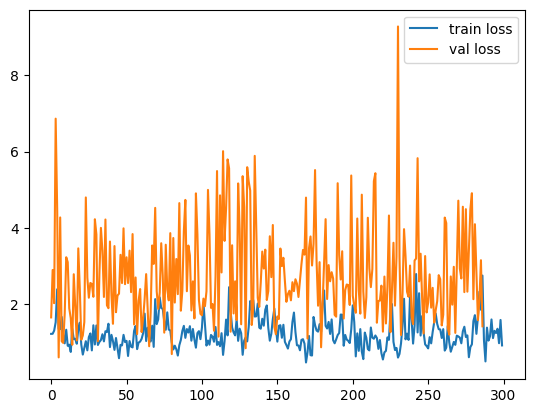

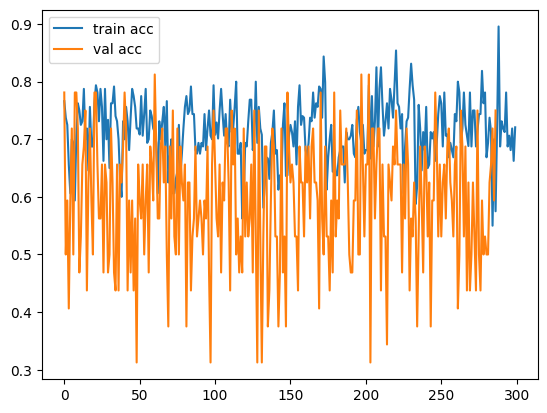

<Figure size 640x480 with 0 Axes>

In [26]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [27]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [28]:
y_pred = model.predict(test_set)

42/42 ━━━━━━━━━━━━━━━━━━━━ 16s 369ms/step


In [29]:
y_pred

array([[1.4108256e-04, 1.1969121e-03, 3.6256370e-01, ..., 3.3376546e-12,
        2.2449003e-06, 1.4925131e-07],
       [1.5892079e-03, 1.9338841e-03, 3.4747890e-01, ..., 5.5901599e-11,
        1.6168100e-07, 6.4835333e-12],
       [2.0390456e-05, 1.0910899e-08, 2.8198120e-01, ..., 2.2438974e-11,
        3.3159742e-19, 6.1031958e-05],
       ...,
       [5.8289821e-04, 4.2839386e-03, 9.7295094e-01, ..., 2.1700437e-13,
        4.2186681e-09, 5.2070770e-12],
       [2.7739141e-02, 5.1466354e-06, 7.9644006e-01, ..., 5.8770907e-14,
        4.6332727e-10, 3.4957931e-12],
       [4.2391103e-02, 8.6787908e-04, 1.0874738e-01, ..., 1.1050572e-07,
        1.9845308e-07, 2.2602007e-08]], dtype=float32)

In [30]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [31]:
y_pred

array([4, 3, 4, 0, 4, 0, 3, 2, 5, 2, 5, 1, 5, 5, 0, 2, 3, 2, 4, 2, 7, 0,
       2, 5, 0, 1, 1, 2, 2, 2, 4, 3, 1, 3, 5, 3, 5, 3, 1, 4, 0, 5, 1, 1,
       2, 3, 5, 2, 2, 5, 5, 7, 2, 3, 2, 4, 2, 1, 7, 3, 0, 3, 4, 0, 1, 2,
       2, 3, 2, 3, 2, 1, 2, 2, 4, 2, 0, 3, 2, 2, 2, 2, 4, 2, 5, 0, 2, 3,
       5, 0, 5, 7, 2, 2, 5, 2, 3, 2, 2, 2, 2, 4, 5, 1, 2, 1, 4, 3, 5, 3,
       3, 3, 5, 3, 1, 5, 2, 3, 3, 5, 2, 0, 2, 0, 7, 1, 6, 0, 2, 7, 5, 0,
       7, 5, 0, 3, 3, 2, 3, 5, 3, 2, 5, 1, 1, 2, 2, 0, 5, 3, 2, 5, 5, 2,
       5, 6, 5, 5, 1, 1, 5, 2, 4, 1, 1, 1, 1, 2, 0, 3, 1, 2, 0, 1, 0, 2,
       5, 5, 4, 0, 6, 3, 0, 3, 1, 2, 0, 3, 0, 2, 4, 2, 4, 5, 5, 7, 1, 0,
       0, 2, 2, 1, 1, 5, 4, 0, 3, 3, 5, 1, 3, 2, 3, 1, 2, 1, 4, 3, 2, 2,
       2, 0, 5, 2, 2, 0, 3, 5, 4, 3, 0, 5, 6, 1, 1, 4, 2, 5, 0, 5, 5, 2,
       5, 0, 2, 2, 1, 2, 5, 5, 2, 2, 2, 5, 2, 0, 7, 5, 2, 3, 5, 4, 1, 3,
       7, 2, 0, 5, 3, 3, 2, 1, 2, 2, 2, 5, 2, 2, 4, 1, 5, 0, 5, 2, 3, 3,
       3, 5, 1, 3, 0, 2, 5, 2, 3, 3, 0, 2, 5, 0, 1,

In [35]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [36]:
model=load_model('model_resnet50.h5')

In [44]:
print(img_data)

[[[[-102.95077  -115.790764 -122.691765]
   [-102.95077  -115.790764 -122.691765]
   [-102.95077  -115.790764 -122.691765]
   ...
   [-103.25665  -116.04175  -122.91921 ]
   [-103.16645  -115.95939  -122.83686 ]
   [-103.06449  -115.85743  -122.7349  ]]

  [[-102.95077  -115.790764 -122.691765]
   [-102.95077  -115.790764 -122.691765]
   [-102.95077  -115.790764 -122.691765]
   ...
   [-103.025276 -115.818214 -122.71137 ]
   [-103.025276 -115.82998  -122.719215]
   [-103.0292   -115.8339   -122.72314 ]]

  [[-102.95077  -115.790764 -122.691765]
   [-102.95077  -115.790764 -122.691765]
   [-102.95077  -115.790764 -122.691765]
   ...
   [-102.993904 -115.80645  -122.719215]
   [-102.96645  -115.79861  -122.72314 ]
   [-102.96645  -115.79861  -122.72314 ]]

  ...

  [[-103.04096  -115.97115  -122.934906]
   [-103.04096  -115.97115  -122.934906]
   [-103.04096  -115.97115  -122.934906]
   ...
   [-103.20567  -116.07704  -123.00549 ]
   [-103.20567  -116.07312  -123.009415]
   [-103.20567  

In [38]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))

In [39]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [194., 188., 174.],
        [215., 209., 197.],
        [241., 235., 223.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [247., 245., 233.],
        [245., 242., 233.],
        [244., 241., 232.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 248., 241.],
        [244., 250., 248.],
        [244., 250., 248.]],

       ...,

       [[190., 206., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [172., 179., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[187., 205., 227.],
        [187., 205., 227.],
        [187., 205., 227.],
        ...,
        [172., 179., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [187., 2

In [40]:
x.shape

(224, 224, 3)

In [41]:
x=x/255

In [42]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [43]:

model.predict(img_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


array([[7.2571511e-23, 9.9999297e-01, 8.2594496e-25, 3.5168455e-09,
        1.5605037e-06, 5.5331207e-06, 1.9751561e-19, 3.1352141e-29,
        2.5470357e-21]], dtype=float32)

In [45]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [47]:
a

array([1])

In [69]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import load_model
import numpy as np

# Load the model once outside the function
model = load_model('model_resnet50.h5')

def predict_image(img_path, model, class_names):
    """
    Function to predict the class of an input image using the trained model.
    
    Parameters:
    img_path (str): Path to the image file.
    model (Model): Trained Keras model.
    class_names (list): List of class names corresponding to the model's outputs.
    
    Returns:
    str: Predicted class.
    """
    # Load the image with the target size
    img = image.load_img(img_path, target_size=(224, 224))
    
    # Convert the image to a numpy array
    img_array = image.img_to_array(img)
    
    # Expand dimensions to match the input shape (1, 224, 224, 3)
    img_array = np.expand_dims(img_array, axis=0)
    
    # Preprocess the image (same as used during training)
    img_array = preprocess_input(img_array)
    
    # Predict the class probabilities
    predictions = model.predict(img_array)
    
    # Print raw predictions
    print("Raw predictions:")
    for i, prob in enumerate(predictions[0]):
        print(f"{class_names[i]}: {prob:.4f}")
    
    # Find the index of the class with the highest probability
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    
    # Return the predicted class name
    return class_names[predicted_class_index]

# Example usage
class_names = ['audi', 'Hyundai Creta', 'lamborgini', 'Mahindra Scorpio', 'mercedes', 'Rolls Royce', 'Swift', 'Tata Safari', 'Toyota Innova']

# Test with multiple images
test_images = [
    'Datasets/Test/Swift/268.jpg',
    'Datasets/Test/audi/21.jpg',
    'Datasets/Test/lamborgini/1.jpg'
]

for img_path in test_images:
    predicted_class = predict_image("/Users/soumallyachandra/Desktop/Car Prediction/Datasets/Test/lamborghini/11.jpg", model, class_names)
    print(f"\nImage: {img_path}")
    print(f"The predicted class is: {predicted_class}")
    print("-" * 50)

# Additional diagnostics
print("\nModel Summary:")
model.summary()

print("\nModel Configuration:")
print(model.get_config())

# Check if the last layer matches the number of classes
last_layer = model.layers[-1]
print(f"\nLast layer output shape: {last_layer.output_shape}")
print(f"Number of classes: {len(class_names)}")
if last_layer.output_shape[-1] != len(class_names):
    print("Warning: The number of output neurons doesn't match the number of classes!")

# Print model compile information
print("\nModel Compile Info:")
print(f"Loss function: {model.loss}")
print(f"Optimizer: {model.optimizer.__class__.__name__}")
print(f"Metrics: {model.metrics_names}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step
Raw predictions:
audi: 0.0000
Hyundai Creta: 1.0000
lamborgini: 0.0000
Mahindra Scorpio: 0.0000
mercedes: 0.0000
Rolls Royce: 0.0000
Swift: 0.0000
Tata Safari: 0.0000
Toyota Innova: 0.0000

Image: Datasets/Test/Swift/268.jpg
The predicted class is: Hyundai Creta
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Raw predictions:
audi: 0.0000
Hyundai Creta: 1.0000
lamborgini: 0.0000
Mahindra Scorpio: 0.0000
mercedes: 0.0000
Rolls Royce: 0.0000
Swift: 0.0000
Tata Safari: 0.0000
Toyota Innova: 0.0000

Image: Datasets/Test/audi/21.jpg
The predicted class is: Hyundai Creta
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Raw predictions:
audi: 0.0000
Hyundai Creta: 1.0000
lamborgini: 0.0000
Mahindra Scorpio: 0.0000
mercedes: 0.0000
Rolls Royce: 0.0000
Swift: 0.0000
Tata Safari: 0.0000
Toyota Innova: 0.0000

Image: Datasets/Test/lamborgini/1.jpg
The predicted class is: Hyundai

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,490,891 (93.43 MB)

 Trainable params: 903,177 (3.45 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 2 (12.00 B)


Model Configuration:
{'name': 'functional', 'trainable': True, 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_shape': (None, 224, 224, 3), 'dtype': 'float32', 'sparse': False, 'name': 'input_layer'}, 'registered_name': None, 'name': 'input_layer', 'inbound_nodes': []}, {'module': 'keras.layers', 'class_name': 'ZeroPadding2D', 'config': {'name': 'conv1_pad', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'padding': ((3, 3), (3, 3)), 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': (None, 224, 224, 3)}, 'name': 'conv1_pad', 'inbound_nodes': [{'args': ({'class_name': '__keras_tensor__', 'config': {'shape': (None, 224, 224, 3), 'dtype': 'float32', 'keras_history': ['input_layer', 0, 0]}},), 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv1_conv', 'trainable': False, 'dtype': {'modul

AttributeError: 'Dense' object has no attribute 'output_shape'